In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize

In [2]:
# Enter your own path to the corpus.
df = pd.read_csv('../Innovation/Innovation-Scopus-clean.tab', delimiter='\t')
df = df.drop([0, 1])
new_df = df[['Title', 'Date', 'Abstract', 'CitedBy']]
# remove instances with empty abstracts
new_df = new_df.dropna(subset=['Abstract'])

In [3]:
tokens = new_df['Abstract'].apply(word_tokenize)

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stop_words = set(stopwords.words('english'))
regex = "(?u)\\b[\\w-]+\\b"

def tokenize(text):
    text = text.lower()
    tokenizer = RegexpTokenizer(regex)
    tokens = tokenizer.tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

new_df['tokens'] = new_df['Abstract'].apply(tokenize)

In [5]:
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(t) for t in text]

new_df['tokens'] = new_df['tokens'].apply(lemmatize)
tokens = [t for t in new_df['tokens']]

### Word Frequencies

Find 5 most frequent words in the corpus. Change fdist.most_common to adjust the number of words to display.

In [6]:
from nltk.probability import FreqDist

flat_tokens = [t for doc in tokens for t in doc]

fdist = FreqDist(flat_tokens)
fdist.most_common(5)

[('tourism', 3515),
 ('innovation', 2355),
 ('development', 1291),
 ('study', 1134),
 ('research', 994)]

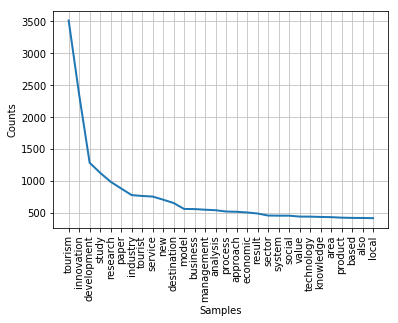

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fdist.plot(30,cumulative=False)
plt.show()

### Context of words

Find common contexts where the words from the list frequently occur.

In [8]:
from nltk import Text

text = Text(flat_tokens)
text.common_contexts(['tourism', 'innovation'])

sustainable_design impact_tourism innovation_hospitality
cultural_research process_information role_firm
enhance_competitiveness improving_potential tourism_researcher
innovation_management development_research system_development
local_system national_policy local_initiative product_also tourism_new
destination_tourism study_development research_tourism


Find commonly co-occurring words.

In [9]:
text.collocations()

case study; stem cell; originality value; tourism industry; design
methodology; competitive advantage; methodology approach; practical
implication; cultural heritage; climate change; hong kong; right
reserved; purpose paper; data collected; sustainable development;
result show; tourist destination; travel agency; sustainable tourism;
tour operator
